## **<ins><center>CASSIOPE BUS TELEMETRY TUTORIAL</center></ins>**

This notebook provides a basic overview and information on how to use the CAS_Bus_Telemetry\*.cdf files to create various plots 

### <ins>Table of Contents</ins>
* [About CASSIOPE Bus Telemetry](#about-cassiope-bus-telemetry)
* [Prerequisites](#prerequisites)
* [How the files are stored](#how-the-files-are-stored)
* [Tutorials](#tutorials)
    * [Reading the Cassiope Bus Telemetry file](#reading-the-cassiope-bus-telemetry-file)
    * [Plotting Wheel Speeds as function of time](#plotting-wheel-speeds-as-function-of-time)
    * [Plotting Battery Voltage as function of time](#plotting-battery-voltage-as-function-of-time)
    * [Plotting MGF Box and Boom temperatures as function of time](#plotting-mgf-box-and-mgf-boom-temperature-as-function-of-time)

<a id="about-cassiope-bus-telemetry"></a>

### <ins>About CASSIOPE Bus Telemetry</ins>

The CASSIOPE_Bus_Telemetry*.cdf files provide CASSIOPE bus housekeeping data to support the e-POP science data. The dataset is composed of various telemetry points including temperatures, voltages, reaction wheel speeds, currents, and others, to provide information on the spacecraft operating state and local environment. The set of provided telemetry points is not exhaustive, so please contact esoc@phys.ucalgary.ca if you would like any further telemetry points provided

<a id="prerequisites"></a>

### <ins>Prerequisites</ins>

1. This tutorial assumes you have some basic understanding of Python and its terminology.

2. You will be required to install the following libraries in your python environment:
    *  __[cdflib](https://pypi.org/project/cdflib/)__
    *  __[matplotlib](https://matplotlib.org/stable/users/installing/index.html)__

<a id="how-the-files-are-stored"></a>

### <ins>How the files are stored</ins>

The Bus Telemetry CDF file is a daily product.

The Common Data Format (CDF) file is written to the International Solar-Terrestrial Physics (ISTP) standard. This CDF file contains many of CASSIOPE’s bus telemetry definitions and their values in binary CDF self describing data.

* Total Battery Current (A)
* Battery Voltage (V)
* MGF Current (A)
* MGF Electronics Box Temperature (°C)
* MGF Boom Temperature (°C)
* Wheel 1 Current (A)
* Wheel 2 Current (A)
* Wheel 3 Current (A)
* Wheel 4 Current (A)
* Wheel 1 Temperature (°C)
* Wheel 2 Temperature (°C)
* Wheel 3 Temperature (°C)
* Wheel 4 Temperature (°C)
* Solar Panel 1 Voltage (V) – Voltage from 1/2 of the top solar panel
* Solar Panel 2 Voltage (V) – Combination of the Anti-Ram +Y and the Ram -Y panel voltages
* Solar Panel 3 Voltage (V) – Combination of the Anti-Ram -Y and the Ram +Y panel voltages
* Solar Panel 4 Voltage (V) – Voltage from 1/2 of the top solar panel
* Total Solar Panel Current (A)
* Wheel 1 Speed (Radians/s)
* Wheel 2 Speed (Radians/s)
* Wheel 3 Speed (Radians/s)
* Wheel 4 Speed (Radians/s)
* IRM Current (A)
* SEI Current (A)
* GAP Current (A)
* RRI Current (A)
* FAI Current (A)
* CERTO Current (A)
* NMS Current (A)
* Bus MAG A Current (A)
* Bus MAG B Current (A)
* Star Sensor Controller A Current (A)
* Star Sensor Controller B Current (A)
* S-band Tx A Current (A)
* S-band Tx B Current (A)
* S-Band Rx A Current (A)
* S-Band Rx B Current (A)
* CDH A Non-Essential Components Current Draw (A)
* CDH B Non-Essential Components Current Draw (A)
* PDM 1 Group 1 Heaters Current (A)
* PDM 1 Group 2 Heaters Current (A)
* PDM 4 Group 1 Heaters Current (A)
* PDM 4 Group 2 Heaters Current (A)
* PDM 5 Group 1 Heaters Current (A)
* PDM 5 Group 2 Heaters Current (A)
* CDH Unit Manager A Current (A)
* CDH Unit Manager B Current (A)
* Battery Survival Heater Current (A)
* CX MO 1 Current (A)
* CX MO 2 Current (A)

<a id="tutorials"></a>

## **<ins><center>Tutorials</center></ins>**

For all the tutorials below, we follow a general principle of first reading the cdf file, storing the required data into objects and then plotting it. 

<a id="reading-the-cassiope-bus-telemetry-file"></a>

#### <ins>Reading the CASSIOPE Bus Telemetry cdf file</ins>

The telemetry cdf files are contained within a *zip* file which needs to be extracted first. You can use any freely available softwares such as *winzip* or *winrar* to extract the cdf file or use python's *zipfile* module to complete the task.

For this tutorial we would be using *cdflib* to read the *cdf* files. We are using the telemetry file from __[2017/02/01](https://epop-data.phys.ucalgary.ca/2017/02/01/CAS_Bus_Telemetry_20170201T000000_20170201T235959_1.1.0.cdf.zip)__ but the process would work the same for any other file. 


In [2]:
import cdflib as cdf                #to work with cdf files
import matplotlib.pyplot as plt     #to plot data
import matplotlib.dates as mdates   #to format x axis 

#reading the cdf file 
cdf_file = cdf.CDF("CAS_Bus_Telemetry_20170201T000000_20170201T235959_1.1.0.cdf")

#printing global attributes 
print(cdf_file.globalattsget())

print("\n")

#printing the information of the cdf file 
print(cdf_file.cdf_info())


{'TITLE': ['Cassiope (Swarm-E) Bus Telemetry'], 'File_naming_convention': ['Title_StartDateTStartTime_EndDateTEndTime_yyyyMMdd'], 'Logical_file_id': ['cassiope_cassiope_k0_20170201_v1.1.0'], 'Logical_source': ['CASSIOPE'], 'Logical_source_description': ['CASSIOPE Satellite Bus Telemetry'], 'Data_version': ['1.0.0'], 'Data_type': ['K0>Survey Data'], 'PI_name': ['A.Yau'], 'PI_affiliation': ['University of Calgary'], 'TEXT': ['https://epop.phys.ucalgary.ca/cassiope/'], 'Discipline': ['Space Physics>Ionospheric Science'], 'Mission_group': ['CASSIOPE'], 'Project': ['CASSIOPE'], 'Source_name': ['CASSIOPE'], 'Descriptor': ['CASSIOPE>Cascade, Smallsat and Ionospheric Polar Explorer'], 'Instrument_type': ['Magnetic Fields (space)', 'Magnetic Fields (space)', 'Magnetic Fields (space)', 'Magnetic Fields (space)', 'Magnetic Fields (space)']}


CDFInfo(CDF=WindowsPath('D:/comm_soft_tools/python_codes/tutorials/bus_tutorial/CAS_Bus_Telemetry_20170201T000000_20170201T235959_1.1.0.cdf'), Version='3.7.

From the output of *cdf_info()* function, we can see that the information necessary for us is stored with *zvariables* section, and we can access that information using the *varget* function of *cdflib*

<a id="plotting-wheel-speeds-as-function-of-time"></a>

#### <ins>Plotting Wheel Speeds as function of time</ins>

Now, that we have the cdf file opened within *cdf_file*, we can use *varget* function to copy the data into an object. For this plot, we will be requiring information from wheel speed variables along with wheel speed times.

Note that the wheel speed times are not in the general UTC format, so to convert it to the same we use *cdflib*'s *to_datetime()* function and store the times in a list

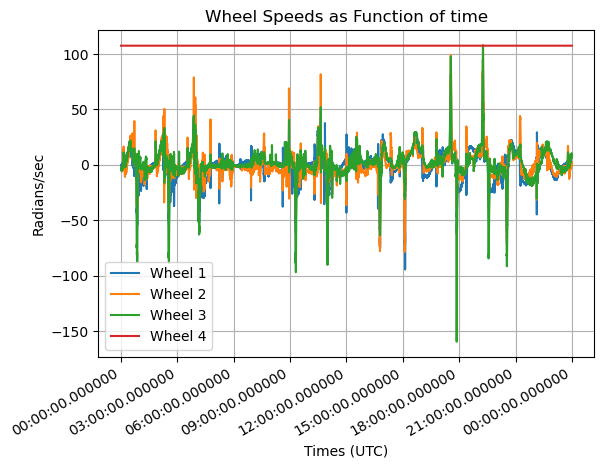

In [3]:
#copy wheel 1 speed 
whl_1_spd = cdf_file.varget("whl_1_spd")
#copy wheel 1 speed times 
whl_1_spd_time = cdf_file.varget("whl_1_spd_time")
#convert times to UTC format
whl_1_spd_time = [cdf.cdfepoch.to_datetime(x) for x in whl_1_spd_time]
#flattening time list
whl_1_spd_time = [x[0] for x in whl_1_spd_time]


#copy wheel 2 speed
whl_2_spd = cdf_file.varget("whl_2_spd")
#copy wheel 2 speed times
whl_2_spd_time = cdf_file.varget("whl_2_spd_time")
#convert times to UTC format
whl_2_spd_time = [cdf.cdfepoch.to_datetime(x) for x in whl_2_spd_time]
#flattening time list
whl_2_spd_time = [x[0] for x in whl_2_spd_time]


#copy wheel 3 speed
whl_3_spd = cdf_file.varget("whl_3_spd")
#copy wheel 3 speed times
whl_3_spd_time = cdf_file.varget("whl_3_spd_time")
#convert times to UTC format
whl_3_spd_time = [cdf.cdfepoch.to_datetime(x) for x in whl_3_spd_time]
#flattening time list
whl_3_spd_time = [x[0] for x in whl_3_spd_time]


#copy wheel 4 speed
whl_4_spd = cdf_file.varget("whl_4_spd")
#copy wheel 4 speed times
whl_4_spd_time = cdf_file.varget("whl_4_spd_time")
#convert times to UTC format
whl_4_spd_time = [cdf.cdfepoch.to_datetime(x) for x in whl_4_spd_time]
#flattening time list
whl_4_spd_time = [x[0] for x in whl_4_spd_time]



#plotting wheel speeds as functions of time on the same graph
plt.plot(whl_1_spd_time, whl_1_spd, label="Wheel 1")
plt.plot(whl_2_spd_time, whl_2_spd, label="Wheel 2")
plt.plot(whl_3_spd_time, whl_3_spd, label="Wheel 3")
plt.plot(whl_4_spd_time, whl_4_spd, label="Wheel 4")

#formatting timestamp values on x-axis
plt.gcf().autofmt_xdate()                                       
#the format in which the dates will be displayed
myfmt = mdates.DateFormatter("%H:%M:%S.%f")                     
#setting the format on plot
plt.gca().xaxis.set_major_formatter(myfmt)                      

plt.title("Wheel Speeds as Function of time")
plt.xlabel("Times (UTC)")
plt.ylabel("Radians/sec")

plt.legend()
plt.grid()
plt.show()

**NOTE:** Wheel 4 of CASSIOPE mission failed in August 2016, so any plot of that value after that time gives a flat line (reason why wheel 4 speed is showing up over 100 rad/sec). 

<a id="plotting-battery-voltage-as-function-of-time"></a>

#### <ins>Plotting Battery Voltage as Function of time</ins>

For this illustration, we will repeat the same steps as before but for *batt_curr* and *batt_curr_time*.

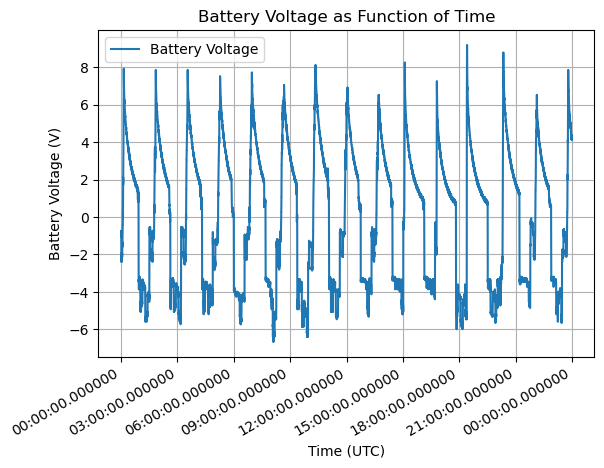

In [6]:
#copy data from battery current 
batt_curr = cdf_file.varget("batt_curr")
#copy data from battery current time 
batt_curr_time = cdf_file.varget("batt_curr_time")
#converting time to UTC
batt_curr_time = [cdf.cdfepoch.to_datetime(x) for x in batt_curr_time]
#flattening the list
batt_curr_time = [x[0] for x in batt_curr_time]


#plotting the graph
plt.plot(batt_curr_time, batt_curr, label="Battery Voltage")


#formatting timestamp values on x-axis
plt.gcf().autofmt_xdate()                                       
#the format in which the dates will be displayed
myfmt = mdates.DateFormatter("%H:%M:%S.%f")                     
#setting the format on plot
plt.gca().xaxis.set_major_formatter(myfmt)                      

plt.title("Battery Voltage as Function of Time")
plt.xlabel("Time (UTC)")
plt.ylabel("Battery Voltage (V)")

plt.legend()
plt.grid()
plt.show()

<a id="plotting-mgf-box-and-mgf-boom-temperature-as-function-of-time">

#### <ins>Plotting MGF Box and Boom temperatures as function of time</ins> 

Once again, we will repeat the same process as before but for *mgf_box_temp* and *mgf_boom_temp*. 

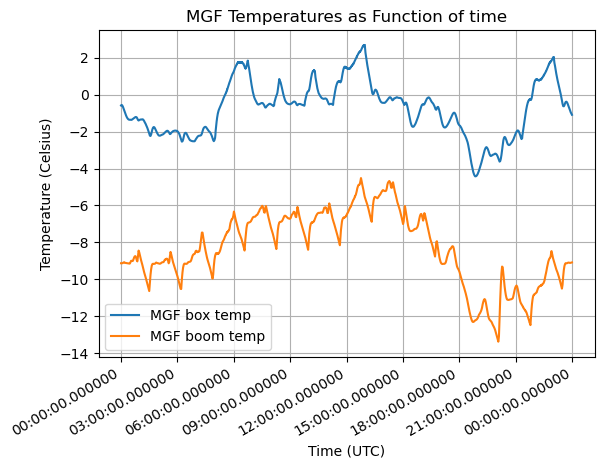

In [7]:
#copy the data from mgf_box_temp
mgf_box_temp = cdf_file.varget("mgf_box_temp")
#copy data from mgf_boom_temp
mgf_boom_temp = cdf_file.varget("mgf_boom_temp")
#copy mgf_box_temp_time
mgf_box_temp_time = cdf_file.varget("mgf_box_temp_time")
#copy mgf_boom_temp_time
mgf_boom_temp_time = cdf_file.varget("mgf_boom_temp_time")

#convert time to UTC
mgf_box_temp_time = [cdf.cdfepoch.to_datetime(x) for x in mgf_box_temp_time]
#flattening the list
mgf_box_temp_time = [x[0] for x in mgf_box_temp_time]

#convert time to UTC
mgf_boom_temp_time = [cdf.cdfepoch.to_datetime(x) for x in mgf_boom_temp_time]
#flattening the list
mgf_boom_temp_time = [x[0] for x in mgf_boom_temp_time]


#plotting the graph
plt.plot(mgf_box_temp_time, mgf_box_temp, label="MGF box temp")
plt.plot(mgf_boom_temp_time, mgf_boom_temp, label="MGF boom temp")

#formatting timestamp values on x-axis
plt.gcf().autofmt_xdate()                                       
#the format in which the dates will be displayed
myfmt = mdates.DateFormatter("%H:%M:%S.%f")                     
#setting the format on plot
plt.gca().xaxis.set_major_formatter(myfmt)                      

plt.title("MGF Temperatures as Function of time")
plt.xlabel("Time (UTC)")
plt.ylabel("Temperature (Celsius)")

plt.legend()
plt.grid()
plt.show()